In [20]:
def x_cartesian(v_hex, u_hex, D = 1):
    return D * v_hex * np.cos(np.radians(30))

def y_cartesian(v_hex, u_hex, D = 1):
    return D * u_hex + D * v_hex * 0.5

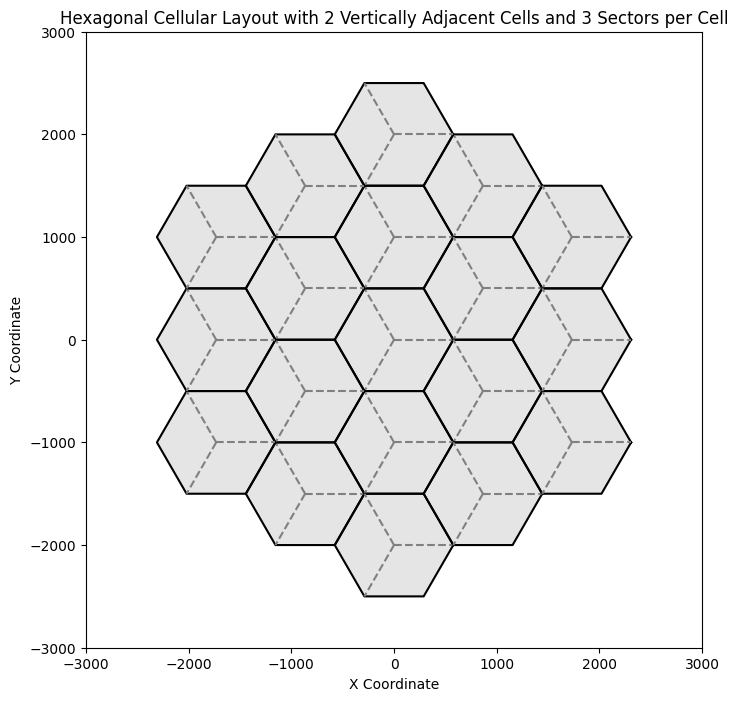

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# hex parameters
height = 1000  # height of hex
radius = height / np.sqrt(3)  # radius of hex based on height

# Define hexagonal coordinates for two cells, placed vertically adjacent
hex_positions = [[0,0], [0,1], [1,1], [0,2], [1,0], [2,0], [-1, 1], [-1, -1], [1, -1], [0, -1], [0, -2], [1, -2], [2, -2], [2, -1], [-1, 0], [-1, 2], [-2, 0], [-2, 1], [-2, 2]]
hex_positions = [(x_cartesian(c[0], c[1], height), y_cartesian(c[0], c[1], height)) for c in hex_positions]

##ction to plot a hexagon
def plot_hexagon(ax, center_x, center_y, radius, color='black'):
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = center_x + radius * np.cos(angles)
    y_hex = center_y + radius * np.sin(angles)
    ax.plot(x_hex, y_hex, color=color)
    ax.fill(x_hex, y_hex, color=color, alpha=0.1)

# Function to plot a cell with 3 sectors
def plot_cell_with_sectors(ax, center_x, center_y, radius):
    # Draw the cell's hexagonal boundary
    plot_hexagon(ax, center_x, center_y, radius)

    # Draw the 3 sectors within each cell (120° each)
    for i in range(3):
        angle = i * (2 * np.pi / 3)  # Starting angle for each sector
        x_sector = [center_x, center_x + radius * np.cos(angle)]
        y_sector = [center_y, center_y + radius * np.sin(angle)]
        ax.plot(x_sector, y_sector, color='gray', linestyle='--')

# Plot the entire layout
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title("Hexagonal Cellular Layout with 2 Vertically Adjacent Cells and 3 Sectors per Cell")

# Plot each cell at the specified hexagonal coordinates
for (x, y) in hex_positions:
    plot_cell_with_sectors(ax, x, y, radius)

# Adjust plot limits and labels
plt.xlim(-3 * height, 3 * height)
plt.ylim(-3 * height, 3 * height)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(False)
plt.show()


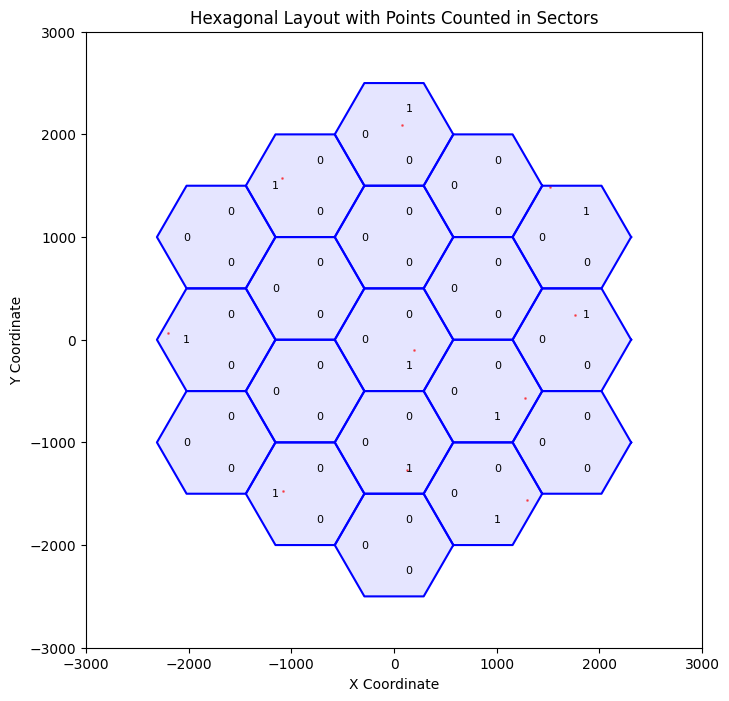

In [22]:
# Function to generate random points inside hexagonal areas
def is_point_in_hexagon(x, y, center_x, center_y, radius):
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = center_x + radius * np.cos(angles)
    y_hex = center_y + radius * np.sin(angles)
    hex_path = plt.Polygon(list(zip(x_hex, y_hex)))
    return hex_path.contains_point((x, y))

# Generate random points
def generate_random_points_in_hexagons(hex_positions, radius, height, num_points=10):
    min_x = min(center_x - radius for center_x, _ in hex_positions)
    max_x = max(center_x + radius for center_x, _ in hex_positions)
    min_y = min(center_y - height/2 for _, center_y in hex_positions)
    max_y = max(center_y + height/2 for _, center_y in hex_positions)
    points = []
    while len(points) < num_points:
        random_x = np.random.uniform(min_x, max_x, num_points)
        random_y = np.random.uniform(min_y, max_y, num_points)
        for x, y in zip(random_x, random_y):
            if any(is_point_in_hexagon(x, y, center_x, center_y, radius) for center_x, center_y in hex_positions):
                points.append((x, y))
            if len(points) >= num_points:
                break
    return points

# Function to calculate which sector a point belongs to
def calculate_sector(x, y, center_x, center_y):
    angle = np.arctan2(y - center_y, x - center_x) * 180 / np.pi  # Convert to degrees
    angle = (angle + 360) % 360  # Normalize to 0–360°
    if 0 <= angle < 120:
        return 0  # Sector 1
    elif 120 <= angle < 240:
        return 1  # Sector 2
    else:
        return 2  # Sector 3

# Function to count points in each sector for each hexagon
def count_points_in_sectors(hex_positions, points, radius):
    sector_counts = []
    for center_x, center_y in hex_positions:
        counts = [0, 0, 0]  # Initialize counts for 3 sectors
        for x, y in points:
            if is_point_in_hexagon(x, y, center_x, center_y, radius):
                sector = calculate_sector(x, y, center_x, center_y)
                counts[sector] += 1
        sector_counts.append(((center_x, center_y), counts))
    return sector_counts

# Generate the points
random_points = generate_random_points_in_hexagons(hex_positions, radius, height)

# Count the points in each sector
sector_counts = count_points_in_sectors(hex_positions, random_points, radius)

# Plot the hexagonal layout with sector counts
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title("Hexagonal Layout with Points Counted in Sectors")

# Plot the hexagonal grid and counts
for (center_x, center_y), counts in sector_counts:
    plot_hexagon(ax, center_x, center_y, radius, color='blue')
    # Add counts for each sector as text
    for i, count in enumerate(counts):
        angle = (i * 120 + 60) * np.pi / 180  # Sector label position
        x_label = center_x + 0.5 * radius * np.cos(angle)
        y_label = center_y + 0.5 * radius * np.sin(angle)
        ax.text(x_label, y_label, str(count), color='black', fontsize=8, ha='center', va='center')

# Plot the random points
x_points, y_points = zip(*random_points)
ax.scatter(x_points, y_points, color='red', s=1, alpha=0.5)

plt.xlim(height * -3, height * 3)
plt.ylim(height * -3, height * 3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(False)
plt.show()

Selected Users and Their Distances:
User 1: Position=(-123.33, 56.68), Distance to Center=135.73
User 2: Position=(-102.17, 2467.38), Distance to Center=2469.49
User 3: Position=(836.89, -168.36), Distance to Center=853.65
User 4: Position=(345.98, -1099.21), Distance to Center=1152.38
User 5: Position=(578.96, -1565.01), Distance to Center=1668.67
User 6: Position=(637.79, -1950.40), Distance to Center=2052.04
User 7: Position=(1765.44, -610.42), Distance to Center=1867.99
User 8: Position=(-730.57, -353.92), Distance to Center=811.79
User 9: Position=(-1795.70, -1227.82), Distance to Center=2175.34


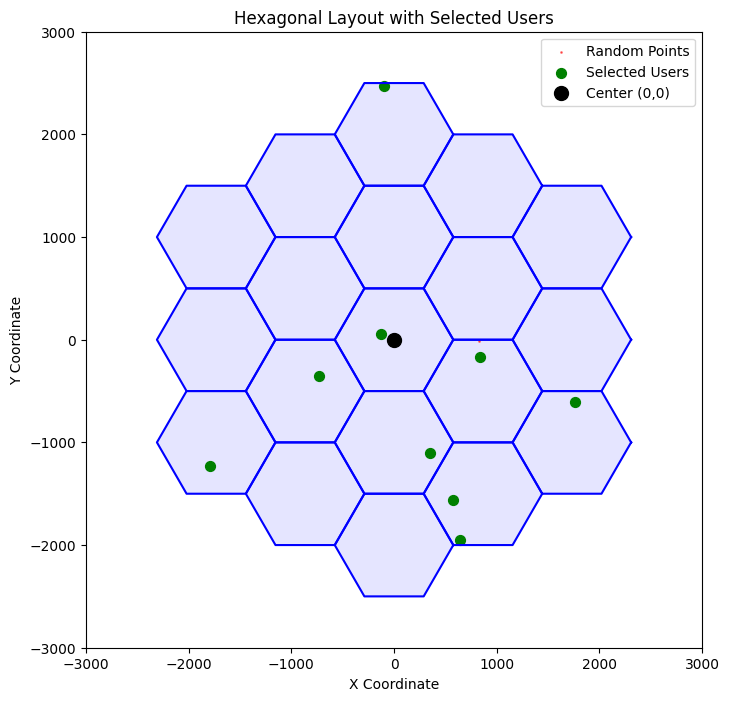

In [23]:
# Select one user per sector
def select_one_user_per_sector(hex_positions, random_points, radius):
    users_per_sector = []  # List to store one user per sector

    for center_x, center_y in hex_positions:
        # Initialize lists for each sector
        sector_users = {0: [], 1: [], 2: []}

        # Sort points into sectors
        for x, y in random_points:
            if is_point_in_hexagon(x, y, center_x, center_y, radius):
                sector = calculate_sector(x, y, center_x, center_y)
                sector_users[sector].append((x, y))

        # Pick one random user from each sector
        for sector in range(3):
            if sector_users[sector]:
                selected_user = sector_users[sector][0]  # Choose the first user in the sector
                users_per_sector.append(selected_user)

    return users_per_sector


# Generate random points
random_points = generate_random_points_in_hexagons(hex_positions, radius, height)

# Select one user per sector
users = select_one_user_per_sector(hex_positions, random_points, radius)

# Calculate distances to center (0, 0)
distances_to_center = [np.sqrt((x - 0)**2 + (y - 0)**2) for x, y in users]

# Display results
print("Selected Users and Their Distances:")
for i, ((x, y), distance) in enumerate(zip(users, distances_to_center)):
    print(f"User {i + 1}: Position=({x:.2f}, {y:.2f}), Distance to Center={distance:.2f}")

# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title("Hexagonal Layout with Selected Users")

# Plot hexagonal grid
for center_x, center_y in hex_positions:
    plot_hexagon(ax, center_x, center_y, radius, color='blue')

# Plot random points
x_points, y_points = zip(*random_points)
ax.scatter(x_points, y_points, color='red', s=1, alpha=0.5, label="Random Points")

# Plot selected users
x_users, y_users = zip(*users)
ax.scatter(x_users, y_users, color='green', s=50, label="Selected Users")

# Highlight the central point
ax.scatter([0], [0], color='black', s=100, label='Center (0,0)')

plt.xlim(height * -3, height * 3)
plt.ylim(height * -3, height * 3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(False)
plt.show()


(array([-173.1558071]), array([203.62380646]), np.float64(0.0), 0.0)
SIR = 131.02489727901184


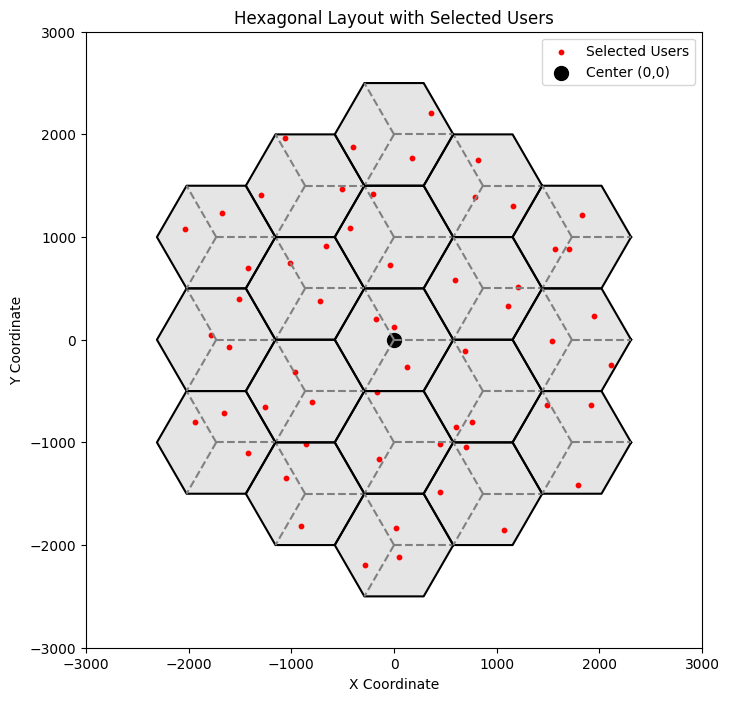

In [24]:
  # Generate random points
def generate_n_random_points_in_hexagons(hex_positions, radius, height, num_points=1):
    points = []
    for center_x, center_y in hex_positions:
        curr = 0
        min_x = center_x - radius
        max_x = center_x + radius
        min_y = center_y - height / 2
        max_y = center_y + height / 2
        
        sector_users = {0: [], 1: [], 2: []}
        while (len(sector_users[0]) < num_points) or (len(sector_users[1]) < num_points) or (len(sector_users[2]) < num_points):
            random_x = np.random.uniform(min_x, max_x, 1)
            random_y = np.random.uniform(min_y, max_y, 1)

            if is_point_in_hexagon(random_x, random_y, center_x, center_y, radius):
                sector = calculate_sector(random_x, random_y, center_x, center_y)
                if (len(sector_users[sector]) < num_points):
                    sector_users[sector].append((random_x, random_y))
                    points.append((random_x, random_y, center_x, center_y))
                    curr += 1
    return points

def print_points_param(str, param_str, users, param):
    print(str)
    for i, ((x, y), distance) in enumerate(zip(users, param)):
        x_float = float(x)
        y_float = float(y)
        distance_float = float(distance)
        print(f"User {i + 1}: Position=({x_float:.2f}, {y_float:.2f}), {param_str}={distance_float}")

# Generate random points
users = generate_n_random_points_in_hexagons(hex_positions, radius, height)

# Calculate distances to center (0, 0)
distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]

# print_points_param("Selected Users and Their Distances:", "Distance to Center", users, distances_to_center)

nu = 3.8
alpha = 1
pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide 

# print_points_param("Selected Users and Their Pathloss:", "Pathloss to Center", users, pathloss)

sigma = 8 # standard dev used in the normalized distribution of shadowing
pathloss_shadowing = [p + np.random.normal(0, 8) for p in pathloss] # Combining pathloss and Shadowing : Lp * X

# print_points_param("Selected Users and Their Pathloss:", "Pathloss to Center", users, pathloss)
# print_points_param("Selected Users and Their Pathloss + Shadowing:", "Pathloss + Shadowing to Center", users, pathloss_shadowing)


linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]
#print_points_param("Selected Users and Their Pathloss + Shadowing Linear:", "Pathloss + Shadowing to Center", users, linear_ps)

print(users[0])

curr = linear_ps[0][0]
curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
interference = 0
for i in range(1, len(linear_ps)):
    if calculate_sector(users[i][0][0], users[i][1][0], 0, 0) == curr_sector:
        interference += linear_ps[i][0]

SIR = curr / interference
print(f"SIR = {SIR}")


# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title("Hexagonal Layout with Selected Users")

# Plot each cell at the specified hexagonal coordinates
for (x, y) in hex_positions:
    plot_cell_with_sectors(ax, x, y, radius)



# Plot selected users
x_users, y_users, _, _ = zip(*users)
ax.scatter(x_users, y_users, color='red', s=10, label="Selected Users")

# Highlight the central point
ax.scatter([0], [0], color='black', s=100, label='Center (0,0)')

plt.xlim(height * -3, height * 3)
plt.ylim(height * -3, height * 3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(False)
plt.show()

### Monte Carlo simulation

#### $ N_c = 1 $

SIR = 0.36153616993501614


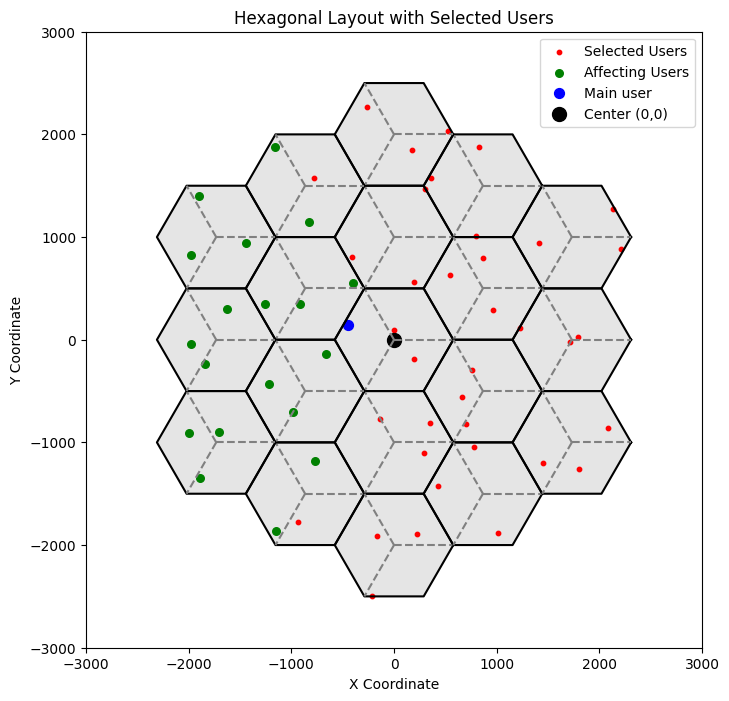

In [ ]:
# Generate random points
nu = 3.8
alpha = 1
sigma = 8

users = generate_n_random_points_in_hexagons(hex_positions, radius, height)
distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide 
pathloss_shadowing = [p + np.random.normal(0, sigma) for p in pathloss] # Combining pathloss and Shadowing : Lp * X
linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]

curr = linear_ps[0][0]
curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
interference = 0

affecting_users = []

for i in range(1, len(linear_ps)):
    directivity_side = calculate_sector(users[i][0][0], users[i][1][0], users[0][2], users[0][3]) == curr_sector
    if directivity_side:
        interference += linear_ps[i][0]
        affecting_users.append((users[i][0][0], users[i][1][0]))


SIR = curr / interference
print(f"SIR = {SIR}")


# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title("Hexagonal Layout with Selected Users, $N_c = 1$")

# Plot each cell at the specified hexagonal coordinates
for (x, y) in hex_positions:
    plot_cell_with_sectors(ax, x, y, radius)



# Plot selected users
x_users, y_users, _, _ = zip(*users)
x_affusers, y_affusers = zip(*affecting_users)
ax.scatter(x_users, y_users, color='red', s=10, label="Selected Users")
ax.scatter(x_affusers, y_affusers, color='green', s=30, label="Affecting Users")
ax.scatter(users[0][0][0], users[0][1][0], color='blue', s=50, label="Main user")

# Highlight the central point
ax.scatter([0], [0], color='black', s=100, label='Center (0,0)')

plt.xlim(height * -3, height * 3)
plt.ylim(height * -3, height * 3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(False)
plt.show()

In [25]:
N = 1000
nu = 3.8
alpha = 113

SIRs = []

for i in range(N):  
    # Generate random points
    users = generate_n_random_points_in_hexagons(hex_positions, radius, height)

    # Calculate distances to center (0, 0)
    distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
    pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide 

    sigma = 8 # standard dev used in the normalized distribution of shadowing
    pathloss_shadowing = [p + np.random.normal(0, 8) for p in pathloss] # Combining pathloss and Shadowing : Lp * X
    linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]

    curr = linear_ps[0][0]
    curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
    interference = 0
    for i in range(1, len(linear_ps)):
        directivity_side = calculate_sector(users[i][0][0], users[i][1][0], users[0][2], users[0][3]) == curr_sector
        if directivity_side:
            interference += linear_ps[i][0]

    SIR = curr / interference
    SIRs.append(SIR)


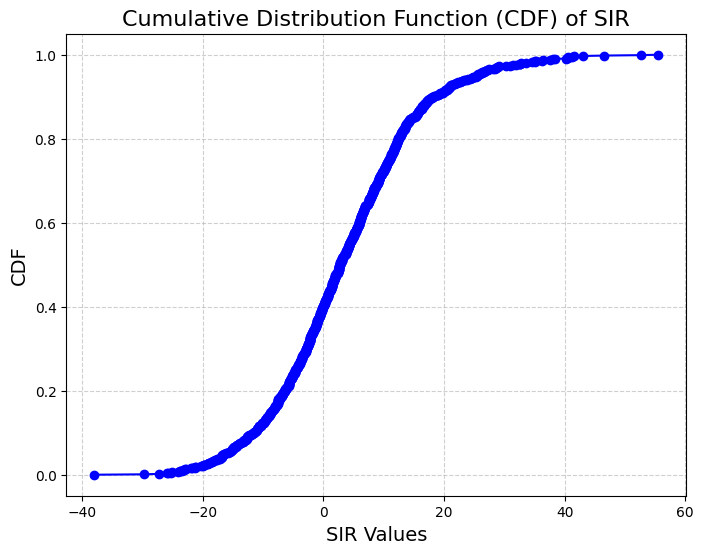

In [26]:
SIRs_DB = [10 * np.log10(SIR) for SIR in SIRs]
# Step 1: Sort the data
sorted_data = np.sort(SIRs_DB)

# Step 2: Calculate the cumulative probabilities
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Step 3: Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Distribution Function (CDF) of SIR', fontsize=16)
plt.xlabel('SIR Values', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### $ N_c = 3 $

SIR = 4.626182572605326


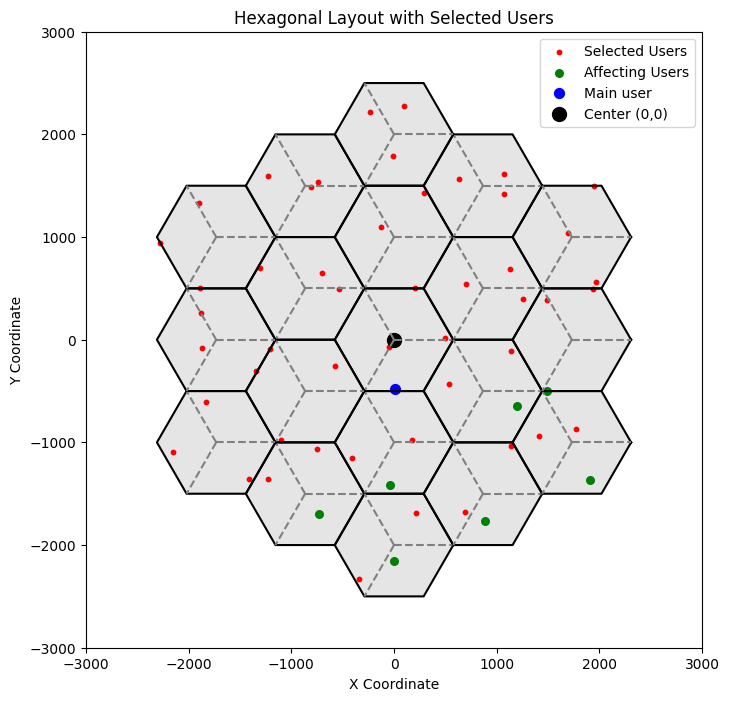

In [ ]:
# Generate random points
nu = 3.8
alpha = 1
sigma = 8

users = generate_n_random_points_in_hexagons(hex_positions, radius, height)
distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide 
pathloss_shadowing = [p + np.random.normal(0, sigma) for p in pathloss] # Combining pathloss and Shadowing : Lp * X
linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]

curr = linear_ps[0][0]
curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
interference = 0

affecting_users = []

for i in range(1, len(linear_ps)):
    directivity_side = calculate_sector(users[i][0][0], users[i][1][0], users[0][2], users[0][3]) == curr_sector
    same_sector = calculate_sector(users[i][0][0], users[i][1][0], users[i][2], users[i][3]) == curr_sector
    if directivity_side and same_sector:
        interference += linear_ps[i][0]
        affecting_users.append((users[i][0][0], users[i][1][0]))


SIR = curr / interference
print(f"SIR = {SIR}")


# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title("Hexagonal Layout with Selected Users, $N_c = 3$")

# Plot each cell at the specified hexagonal coordinates
for (x, y) in hex_positions:
    plot_cell_with_sectors(ax, x, y, radius)



# Plot selected users
x_users, y_users, _, _ = zip(*users)
x_affusers, y_affusers = zip(*affecting_users)
ax.scatter(x_users, y_users, color='red', s=10, label="Selected Users")
ax.scatter(x_affusers, y_affusers, color='green', s=30, label="Affecting Users")
ax.scatter(users[0][0][0], users[0][1][0], color='blue', s=50, label="Main user")

# Highlight the central point
ax.scatter([0], [0], color='black', s=100, label='Center (0,0)')

plt.xlim(height * -3, height * 3)
plt.ylim(height * -3, height * 3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
N = 1000
nu = 3.8
alpha = 113
sigma = 8 # standard dev used in the normalized distribution of shadowing

SIRs_3 = []

for i in range(N):  
    # Generate random points
    users = generate_n_random_points_in_hexagons(hex_positions, radius, height)

    # Calculate distances to center (0, 0)
    distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
    pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide 

    pathloss_shadowing = [p + np.random.normal(0, sigma) for p in pathloss] # Combining pathloss and Shadowing : Lp * X
    linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]

    curr = linear_ps[0][0]
    curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
    interference = 0
    for i in range(1, len(linear_ps)):
        directivity_side = calculate_sector(users[i][0][0], users[i][1][0], users[0][2], users[0][3]) == curr_sector
        same_sector = calculate_sector(users[i][0][0], users[i][1][0], users[i][2], users[i][3]) == curr_sector
        if (directivity_side) and (same_sector):
            interference += linear_ps[i][0]

    SIR = curr / interference
    SIRs_3.append(SIR)


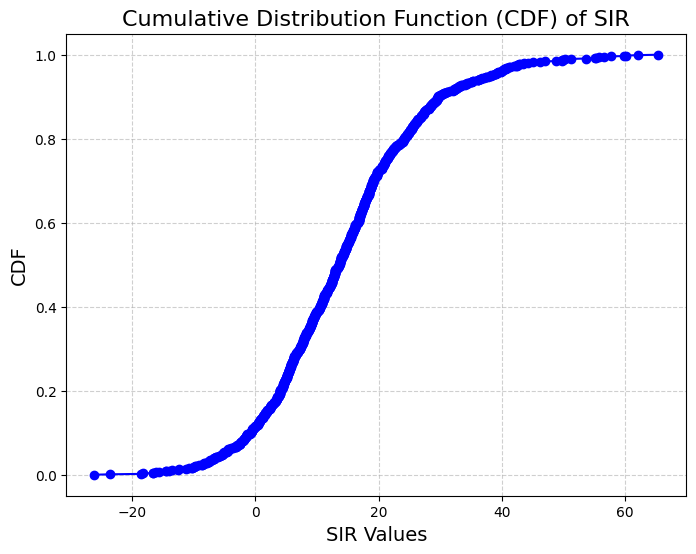

In [28]:
SIRs_3_DB = [10 * np.log10(SIR) for SIR in SIRs_3]
# Step 1: Sort the data
sorted_data = np.sort(SIRs_3_DB)

# Step 2: Calculate the cumulative probabilities
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Step 3: Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Distribution Function (CDF) of SIR', fontsize=16)
plt.xlabel('SIR Values', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### $N_c = 9$

SIR = 1903.0705950629508


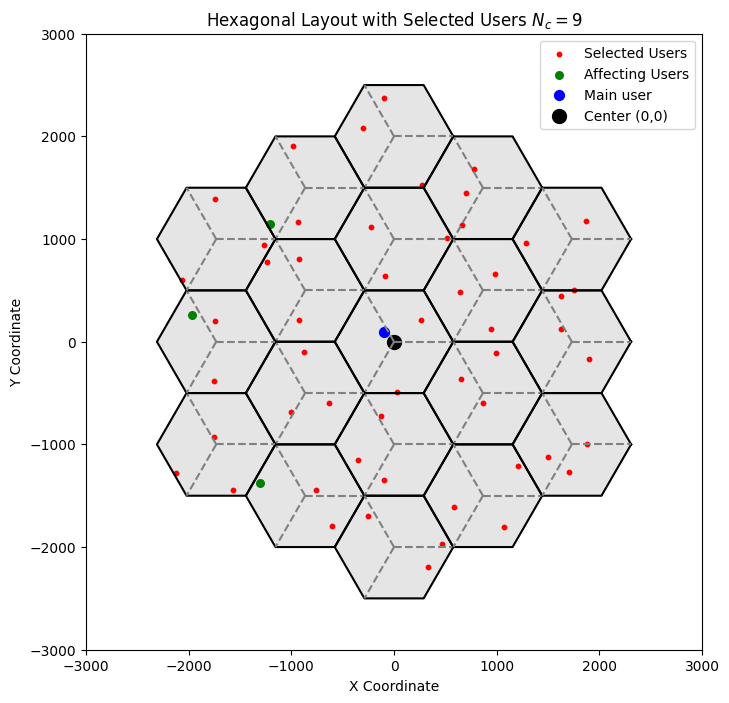

In [ ]:
# Generate random points
nu = 3.8
alpha = 1
sigma = 8

users = generate_n_random_points_in_hexagons(hex_positions, radius, height)
distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide 
pathloss_shadowing = [p + np.random.normal(0, sigma) for p in pathloss] # Combining pathloss and Shadowing : Lp * X
linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]

curr = linear_ps[0][0]
curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
interference = 0

affecting_users = []

for i in range(1, len(linear_ps)):
    directivity_side = calculate_sector(users[i][0][0], users[i][1][0], users[0][2], users[0][3]) == curr_sector
    same_sector = calculate_sector(users[i][0][0], users[i][1][0], users[i][2], users[i][3]) == curr_sector
    same_bw = (2 * v_hex(users[i][2], users[i][3]) + u_hex(users[i][2], users[i][3])) % 3 == curr_bw
    if directivity_side and same_sector and same_bw:
        interference += linear_ps[i][0]
        affecting_users.append((users[i][0][0], users[i][1][0]))


SIR = curr / interference
print(f"SIR = {SIR}")


# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title("Hexagonal Layout with Selected Users, $N_c = 9$")

# Plot each cell at the specified hexagonal coordinates
for (x, y) in hex_positions:
    plot_cell_with_sectors(ax, x, y, radius)



# Plot selected users
x_users, y_users, _, _ = zip(*users)
x_affusers, y_affusers = zip(*affecting_users)
ax.scatter(x_users, y_users, color='red', s=10, label="Selected Users")
ax.scatter(x_affusers, y_affusers, color='green', s=30, label="Affecting Users")
ax.scatter(users[0][0][0], users[0][1][0], color='blue', s=50, label="Main user")

# Highlight the central point
ax.scatter([0], [0], color='black', s=100, label='Center (0,0)')

plt.xlim(height * -3, height * 3)
plt.ylim(height * -3, height * 3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(False)
plt.show()

In [29]:
def v_hex(x, y, D = 1):
    return round(x / (D * np.cos(np.radians(30))))

def u_hex(x, y, D = 1):
    return round((y - D * v_hex(x, y, D) * 0.5) / D)

In [30]:
N = 1000
nu = 3.8
alpha = 113

SIRs_9 = []

for i in range(N):  
    # Generate random points
    users = generate_n_random_points_in_hexagons(hex_positions, radius, height)

    # Calculate distances to center (0, 0)
    distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
    pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide 

    sigma = 8 # standard dev used in the normalized distribution of shadowing
    pathloss_shadowing = [p + np.random.normal(0, 8) for p in pathloss] # Combining pathloss and Shadowing : Lp * X
    linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]

    curr = linear_ps[0][0]
    curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
    curr_bw = (2 * users[0][2] + users[0][3]) % 3
    interference = 0
    for i in range(1, len(linear_ps)):
        directivity_side = calculate_sector(users[i][0][0], users[i][1][0], users[0][2], users[0][3]) == curr_sector
        same_sector = calculate_sector(users[i][0][0], users[i][1][0], users[i][2], users[i][3]) == curr_sector
        same_bw = (2 * v_hex(users[i][2], users[i][3]) + u_hex(users[i][2], users[i][3])) % 3 == curr_bw
        if directivity_side and same_sector and same_bw: 
            interference += linear_ps[i][0]

    SIR = curr / interference
    SIRs_9.append(SIR)


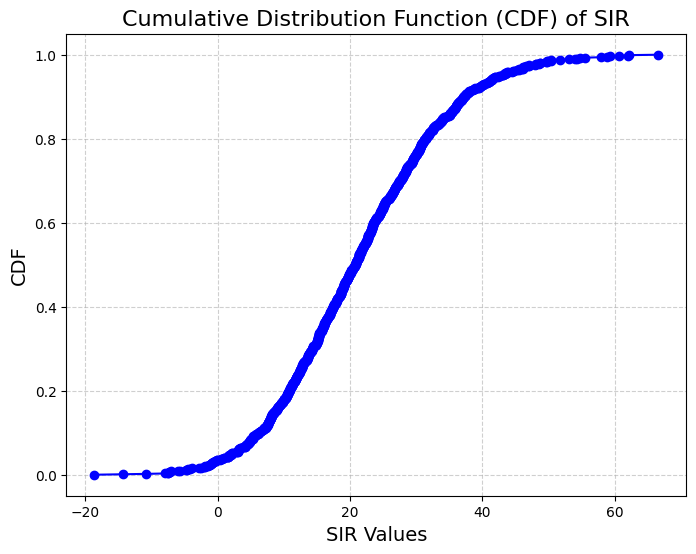

In [31]:
SIRs_9_DB = [10 * np.log10(SIR) for SIR in SIRs_9]
# Step 1: Sort the data
sorted_data = np.sort(SIRs_9_DB)

# Step 2: Calculate the cumulative probabilities
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Step 3: Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Distribution Function (CDF) of SIR', fontsize=16)
plt.xlabel('SIR Values', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()